# <b>Phase 3: Data Analysis</b>

##### <b>Objectives:</b> 
- Analyze data to gain insights about music trends over 3 years
- Find out some of the best categories (best song/album/artist) in each year based on the stats

### <b><u>Step 1</u>: Import library</b>

These are the main libraries used for data crawling:
- `sys`: Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.
- `numpy`: used to get spotipy's client_id, secret and redirect uri in .env file
- `pandas`: used to get accessed to .env files in system
- `matplotlib`: used to support write data to csv files
- `sklearn`: used to support write data to csv files

In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

### <b><u>Step 2</u>: Get the songs DataFrame from songs exploration notebook for analyzing data</b>

At this step, we need to import the `songs_df` varialbe from the songs exploration notebook to analyze data.

In [485]:
%store -r songs_df
%store -r artists_df

songs_df = songs_df
artists_df = artists_df

----
### <b><u>Question 1</u>: Analyze the behaviour of how songs are released from January to December for 3 years</b>

**MEANING:** Know which month(s) of a year the music trend will be exploded with songs and understand how the music industry behave in the 3 recent years (2020, 2021 and 2022). From that, an artist could select the best time in a year to drop their new single/album.

**STEP 1:** Make a copy of song's DataFrame and then add 2 more columns to the DataFrame:
- `year`: represents the year that song is released.
- `month`: represents the month that song is released.

In [486]:
ques1_df = songs_df.copy()

ques1_df['year'] = ques1_df['released_date'].dt.year
ques1_df['month'] = ques1_df['released_date'].dt.month

**STEP 2:** Choose the songs that in between 2020 and 2022 released year and then group by with 2 columns `year` and `month` to get the number of songs. After that, reshape the result's DataFrame to 12 rows for 12 months and 3 columns for 3 years. Finally, convert this numpy array into DataFrame with columns are years and indexes are months.

In [487]:
num_songs_by_month_df = ques1_df[ques1_df['year'].between(2020, 2022)].groupby(['year', 'month']).size()
num_songs_by_month_df = num_songs_by_month_df.to_numpy().reshape(12, 3)
num_songs_by_month_df = pd.DataFrame(num_songs_by_month_df, columns=[2020, 2021, 2022], index=range(1, 13))

**STEP 3:** Visualize the result DataFrame by using line chart.

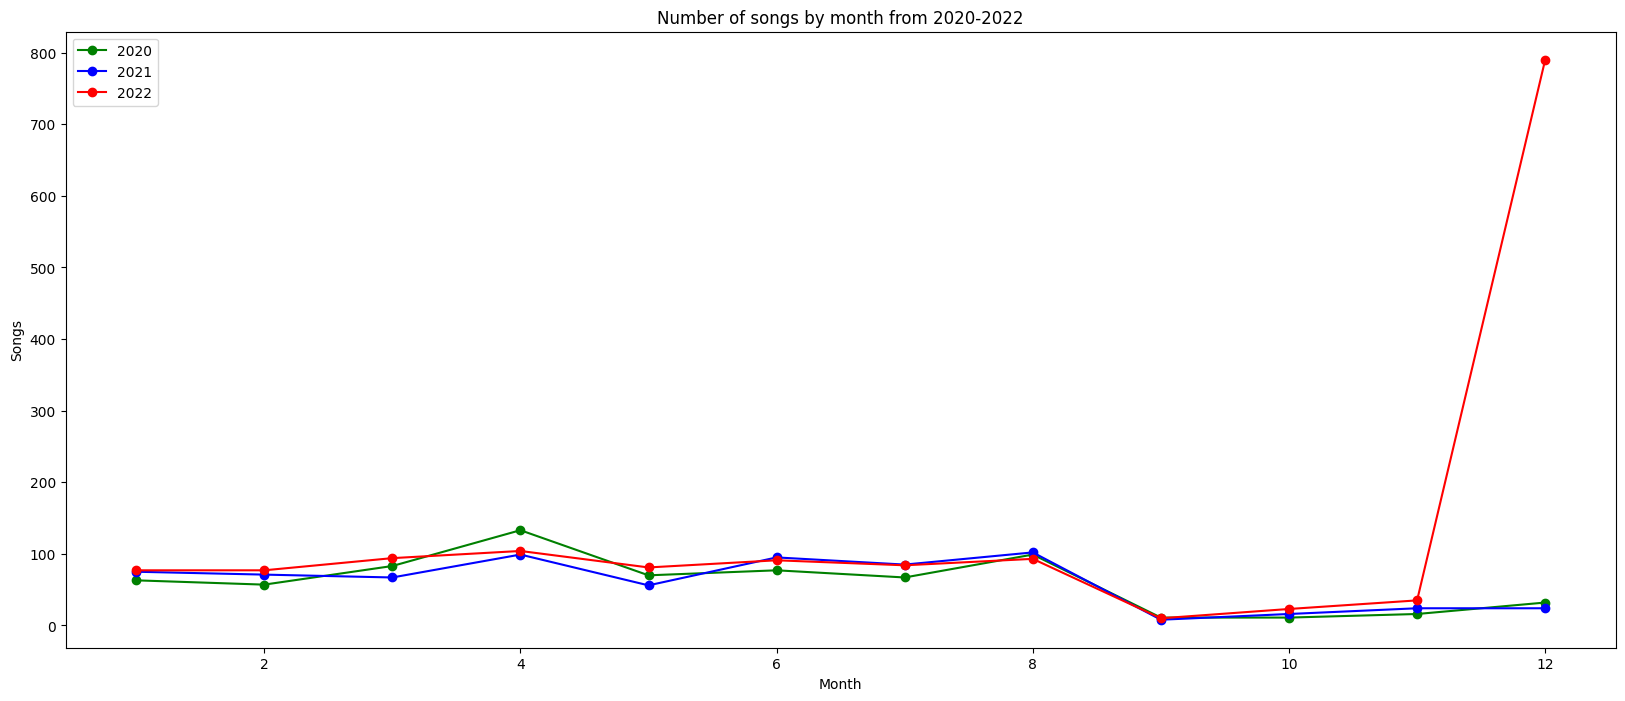

In [488]:
plt.figure(figsize=(20, 8))
plt.plot(num_songs_by_month_df.iloc[:, 0].keys(), num_songs_by_month_df.iloc[:, 0], '-go')
plt.plot(num_songs_by_month_df.iloc[:, 1].keys(), num_songs_by_month_df.iloc[:, 1], '-bo')
plt.plot(num_songs_by_month_df.iloc[:, 2].keys(), num_songs_by_month_df.iloc[:, 2], '-ro')

plt.legend([2020, 2021, 2022])
plt.xlabel("Month")
plt.ylabel("Songs")
plt.title('Number of songs by month from 2020-2022')
plt.show()

**COMMENT:** We can clearly see a major difference between 2022 compared to 2020 and 2021.

- 2020 and 2021 has nearly exact same trendline in each month, with April and August has more songs released.

- Whereas in 2022, there is a dramatic increase in music industry where there are about 800 songs released in December, over 750 songs more compared to November. This could be the holiday seasons (Christmas, New Year's Eve) which explains the enormous amount of songs released

- Therefore, artists can now whether choose a month that has less songs for less competetion for their single/albums are choose an exploding month of songs such as December 2022 for celebrating holiday seasons.

### <b><u>Question 2</u>: How the top 10 genres in each year has changed from 2020 to 2022</b>

**MEANING:** Understand the music trend from 2020 to 2022 to analyze what are the genres that is popular in a specific year or still on trend for a couple years.

**STEP 1:** Make a copy DataFrame from `songs_df`. Then, respectively get the top 10 genres from each year 2020, 2021 and 2022 (except for 'None' genre) and converted into DataFrame with the column is the year of that top 10 genres.
- Let's begin with top 10 genres in 2020.

In [489]:
ques2_df = songs_df.copy()

genres_2020 = ques2_df[ques2_df['released_date'].dt.year == 2020]['genres'] \
                .str.join(',').str.split(',').explode().value_counts() \
                .drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top10_genres_2020 = pd.DataFrame(genres_2020).rename(columns={'genres': 2020})

- Next, do the same thing and get the top 10 genres in 2021.

In [490]:
genres_2021 = ques2_df[ques2_df['released_date'].dt.year == 2021]['genres'] \
                .str.join(',').str.split(',').explode().value_counts() \
                .drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top10_genres_2021 = pd.DataFrame(genres_2021).rename(columns={'genres': 2021})

- Finally, get the top 10 genres in 2022.

In [491]:
genres_2022 = ques2_df[ques2_df['released_date'].dt.year == 2022]['genres'] \
                .str.join(',').str.split(',').explode().value_counts() \
                .drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top10_genres_2022 = pd.DataFrame(genres_2022).rename(columns={'genres': 2022})

**STEP 2:** After getting the top 10 genres in each year from 2020-2022, let's concatenate the 3 DataFrames so that we have a new DataFrame with 3 columns with 3 years respectively.

In [492]:
top_genres_df = pd.concat([top10_genres_2020, top10_genres_2021, top10_genres_2022], axis=1)

**STEP 3:** Finally, visualize the DataFrame by using barchart with multiple labels.

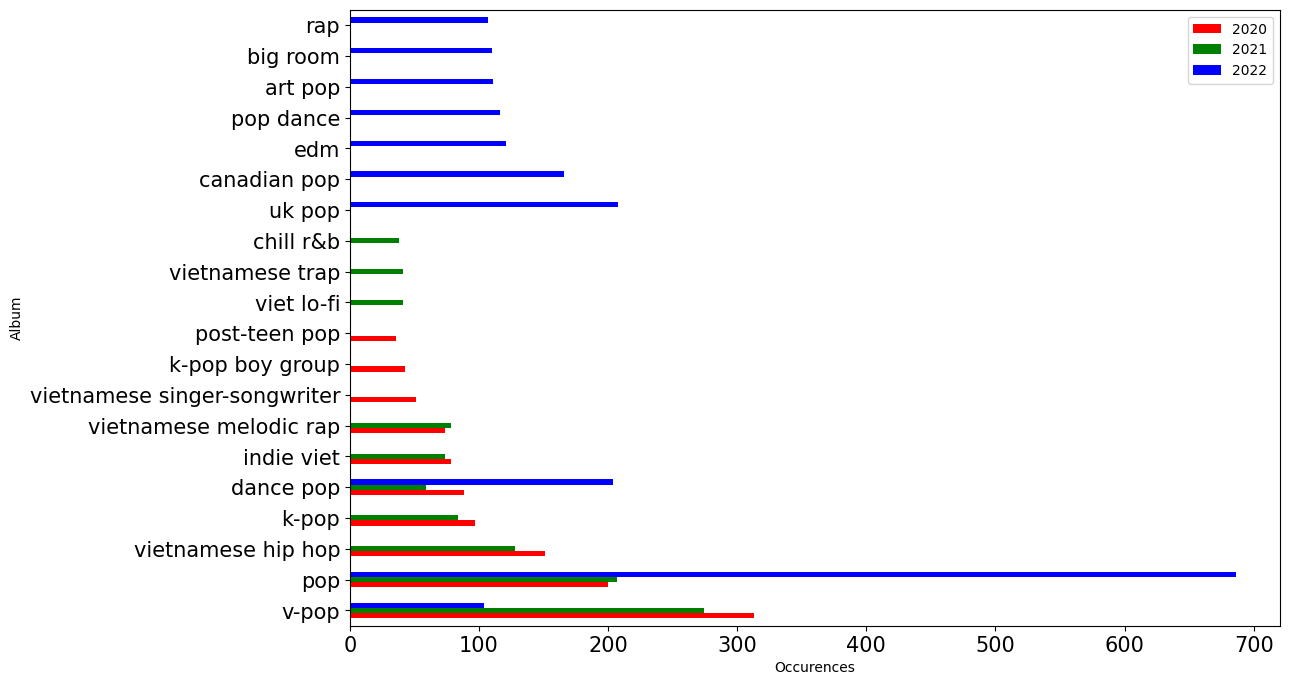

In [493]:
top_genres_df.plot(kind='barh', color=['r', 'g', 'b'], figsize=(12, 8), 
                        xlabel='Occurences', ylabel='Album', fontsize=15);

**COMMENT:** 
- There are some genres that only trending in a specific year such as k-pop boy group or vietnamese singer-songwriter are only trending in 2020, or viet lo-fi, vietnamese trap and chill r&b are only trending in 2021. Furthermore, the number of songs in these genres are all less than 100.

- Meanwhile, there are some genres that are not trending in the last 2 years but now are very trending in 2022 such as rap, edm, pop dance and uk-canadian pop with each genre has at least over 100 songs and at most over 200 songs.

- Vietnamese melodic rap and indie viet are very popular in 2020 and 2021 since at that time of Covid pandemic, there is a rap show with 2 seasons in 2 years and indie artists are working actively in those 2 years.

- On the other hand, there are some solid genres that are still popular in the whole 3 years such as pop and v-pop in general, especially pop in 2022 with almost 700 songs.

### <b><u>Question 3</u>: Is the music industry growing well between quarters in a year? Or is it something else that effect the music industry growth?</b>

**MEANING:** Helps to analyze is the music industry growth doing well or not between 4 quarters in a year from 2020 to 2022. Therefore, we can provide solutions for specific periods which either perform well or not so well.

**STEP 1:** Make a copy DataFrame from `ques1_df`. Then, add another column to the DataFrame called `quarter`, which represents the quarter that the month when that song released is belong to.

In [494]:
ques3_df = ques1_df.copy()

ques3_df.loc[ques3_df['month'].between(1, 3), 'quarter'] = 'Q1'
ques3_df.loc[ques3_df['month'].between(4, 6), 'quarter'] = 'Q2'
ques3_df.loc[ques3_df['month'].between(7, 9), 'quarter'] = 'Q3'
ques3_df.loc[ques3_df['month'].between(10, 12), 'quarter'] = 'Q4'

**STEP 2:** After adding the `quarter` column, now we take the DataFrame, group by with `year` and `quarter` columns and then calculate the average popularity score in each quarter of each year. After that, we need to reshape the DataFrame from size (12, 1) to (4, 3) by converting to NumPy array and then convert back to DataFrame with columns are the 3 years and indexes are the 4 quarters of a year.

In [495]:
num_songs_by_month_df = ques3_df[ques3_df['year'].between(2020, 2022)].groupby(['year', 'quarter'])['popularity'].mean()
num_songs_by_month_df = num_songs_by_month_df.to_numpy().reshape(4, 3)
num_songs_by_month_df = pd.DataFrame(num_songs_by_month_df, columns=[2020, 2021, 2022], index=['Q1', 'Q2', 'Q3', 'Q4'])

**STEP 3:** Finally, we visualize the DataFrame using line chart to see the result.

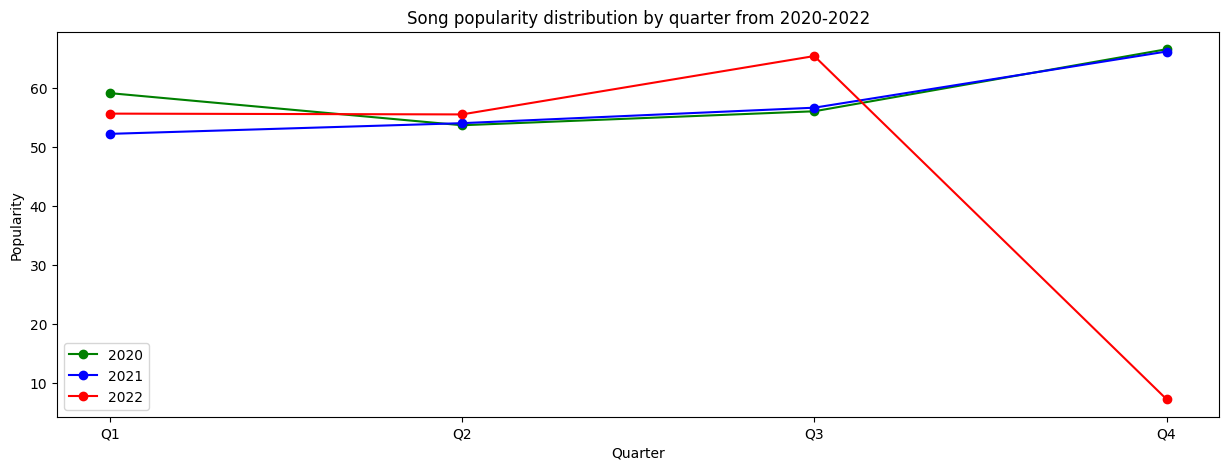

In [496]:
plt.figure(figsize=(15, 5))
plt.plot(num_songs_by_month_df.iloc[:, 0].keys(), num_songs_by_month_df.iloc[:, 0], '-go')
plt.plot(num_songs_by_month_df.iloc[:, 1].keys(), num_songs_by_month_df.iloc[:, 1], '-bo')
plt.plot(num_songs_by_month_df.iloc[:, 2].keys(), num_songs_by_month_df.iloc[:, 2], '-ro')

plt.legend([2020, 2021, 2022])
plt.xlabel("Quarter")
plt.ylabel("Popularity")
plt.title('Song popularity distribution by quarter from 2020-2022')
plt.show()

**COMMENT:** 
- 2020 music growth slightly decreased from Q1 to Q2 but then in Q3 and Q4, they all increased decently, with the lowest rate at around 50 score in Q2 and highest rate at over 60 score in Q4.

- Meanwhile, in 2021, the growth increased stablely without any decrease, making 2021 the finest year of music industry of all 3 years, with lowest rate at 50 score in Q1 and over 60 score in Q4.

- On the other hand, 2022 significantly increased in the first 3 quarters from 55 score rate to over 60 score rate in Q3 (the same result but the last 2 years took 4 quarters to achieve), but then dropped down heavily in Q4 to less than 10 score!

- One of the reasons that comes across us is due to a massive unquality songs exploded in last quarter of 2022, which we analyze the first question that December of 2022 has the largest amount of songs, and since these songs are unquality (having low or even 0 score), making the average score rate of that quarter drop down even below 10. Therefore, we need to be cautious about this, prevent releasing unquality songs so that it won't affect to the overall growth of that quarter.

### <b><u>Question 4</u>: Honor some of the best categories from 2020 to 2022 with all songs (Song of the year, Artist of the year, Album of the year)</b>

**MEANING:** Providing the music chart in 3 years 2020, 2021 and 2022, honoring some of the best categories from all songs `Song of the year`, `Artist of the year` and `Album of the year`.

**STEP 1:** Make a copy DataFrame from `songs_df`. Then, initialize 3 DataFrames that represent all of the songs in a year from 2020 to 2022.

In [497]:
ques4_df = songs_df.copy()
ques4_df['song_info'] = ques4_df[['name', 'artist']].astype(str).agg('-'.join, axis=1)
ques4_df['album_info'] = ques4_df[['album', 'artist']].astype(str).agg('-'.join, axis=1)

songs_2020_df = ques4_df[ques4_df['released_date'].dt.year == 2020]
songs_2021_df = ques4_df[ques4_df['released_date'].dt.year == 2021]
songs_2022_df = ques4_df[ques4_df['released_date'].dt.year == 2022]

**STEP 2:** 

In [498]:
def calculateSongRate(c):
    return c[0]*0.9 + c[1]*0.05 + c[2]*0.05

def calculateArtistRate(c):
    return c[0]*0.65 + c[1]*0.35

def calculateAlbumRate(c):
    return c[0]*0.8 + c[1]*0.2

**STEP 3:** Announce the music chart best categories in year 2020
- SONG OF THE YEAR 2020

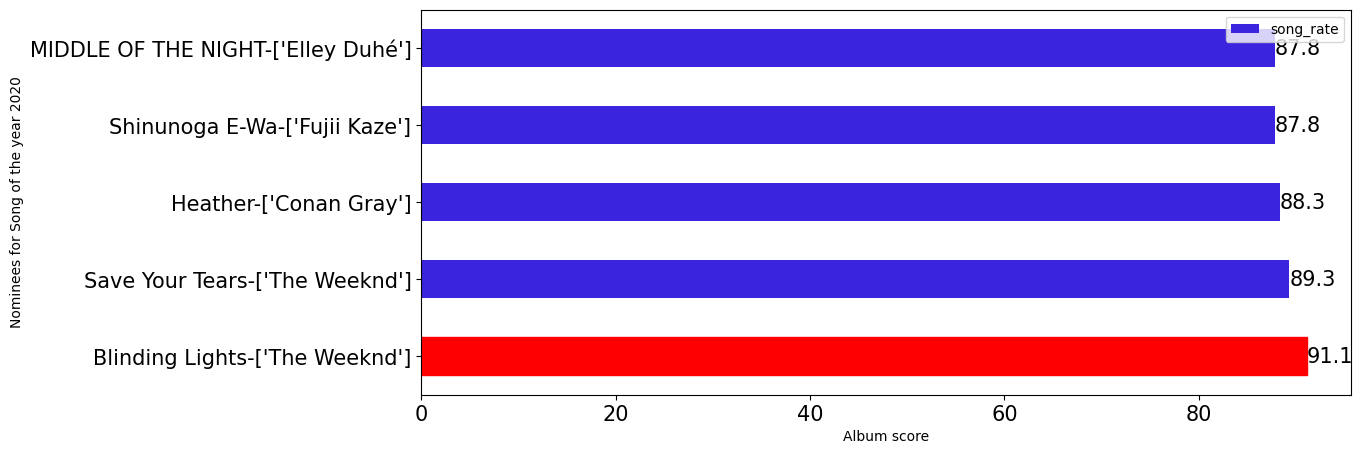

In [499]:
songs_2020_df['song_rate'] = songs_2020_df[['popularity', 'artist_popularity', 'album_popularity']].agg(calculateSongRate, axis=1);
song_of_the_year_2020 = songs_2020_df[['song_info', 'song_rate']].nlargest(n=5, columns=['song_rate']).set_index('song_info')

ax = song_of_the_year_2020.plot(kind='barh', color=(0.23, 0.14, 0.87), figsize=(12, 5), 
                        xlabel='Album score', ylabel='Nominees for Song of the year 2020', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ARTIST OF THE YEAR 2020

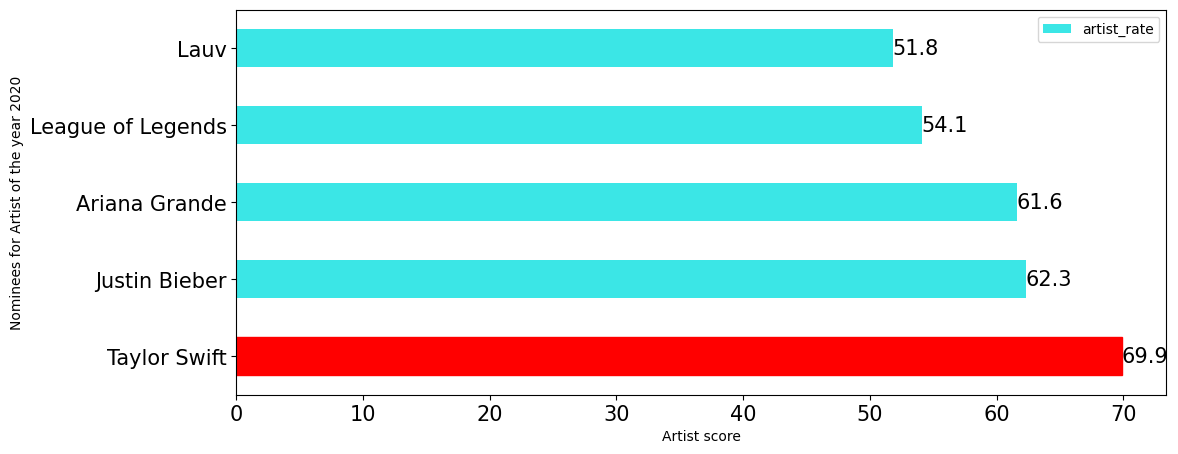

In [500]:
top_artists = songs_2020_df[songs_2020_df['artist_popularity'] == songs_2020_df['artist_popularity'].max()]
artist_top5_occurence = top_artists['artist'].str.join(',').str.split(',').explode().value_counts().nlargest(n=5)

artist_top5_2020 = artists_df[artists_df['name'].isin(artist_top5_occurence.index)][['name', 'popularity']]
artist_top5_2020 = artist_top5_2020.set_index('name').sort_index()
artist_top5_2020['occurence'] = artist_top5_occurence

artist_of_the_year_2020 = artist_top5_2020
artist_of_the_year_2020['artist_rate'] = artist_of_the_year_2020[['popularity', 'occurence']].agg(calculateArtistRate, axis=1)

ax = artist_top5_2020[['artist_rate']].sort_values('artist_rate', ascending=False).plot(kind='barh', color=(0.23, 0.9, 0.9), \
    figsize=(12, 5), xlabel='Artist score', ylabel='Nominees for Artist of the year 2020', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ALBUM OF THE YEAR 2020

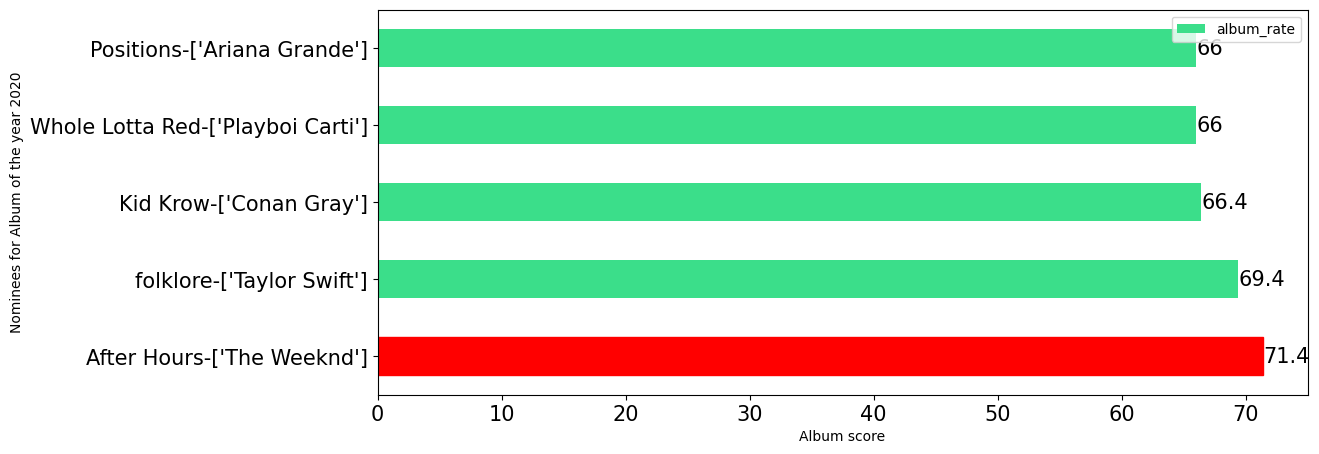

In [501]:
album_occurence = songs_2020_df.value_counts('album')
album_top5_2020 = songs_2020_df.drop_duplicates('album')[['album', 'album_info', 'album_popularity']].nlargest(n=5, columns='album_popularity')

album_occurence = album_occurence[album_occurence.index.map(lambda x: x in album_top5_2020['album'].to_list())].sort_index()
album_top5_2020 = album_top5_2020.set_index('album').sort_index()
album_top5_2020['occurence'] = album_occurence
album_of_the_year_2020 = album_top5_2020.set_index('album_info')

album_of_the_year_2020['album_rate'] = album_of_the_year_2020[['album_popularity', 'occurence']].agg(calculateAlbumRate, axis=1)

ax = album_of_the_year_2020[['album_rate']].sort_values('album_rate', ascending=False).plot(kind='barh', color=(0.23, 0.87, 0.54), \
    figsize=(12, 5), xlabel='Album score', ylabel='Nominees for Album of the year 2020', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

**STEP 4:** Announce the music chart best categories in year 2021
- SONG OF THE YEAR 2021

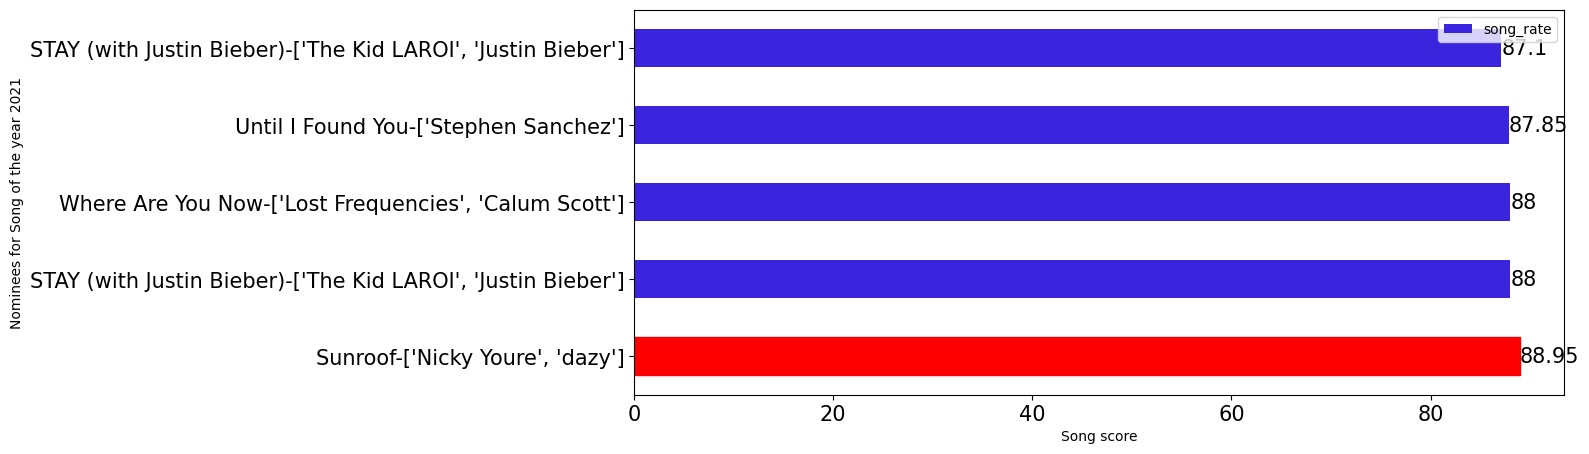

In [502]:
songs_2021_df['song_rate'] = songs_2021_df[['popularity', 'artist_popularity', 'album_popularity']].agg(calculateSongRate, axis=1);
song_of_the_year_2021 = songs_2021_df[['song_info', 'song_rate']].nlargest(n=5, columns=['song_rate']).set_index('song_info')

ax = song_of_the_year_2021.plot(kind='barh', color=(0.23, 0.14, 0.87), figsize=(12, 5), 
                        xlabel='Song score', ylabel='Nominees for Song of the year 2021', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ARTIST OF THE YEAR 2021

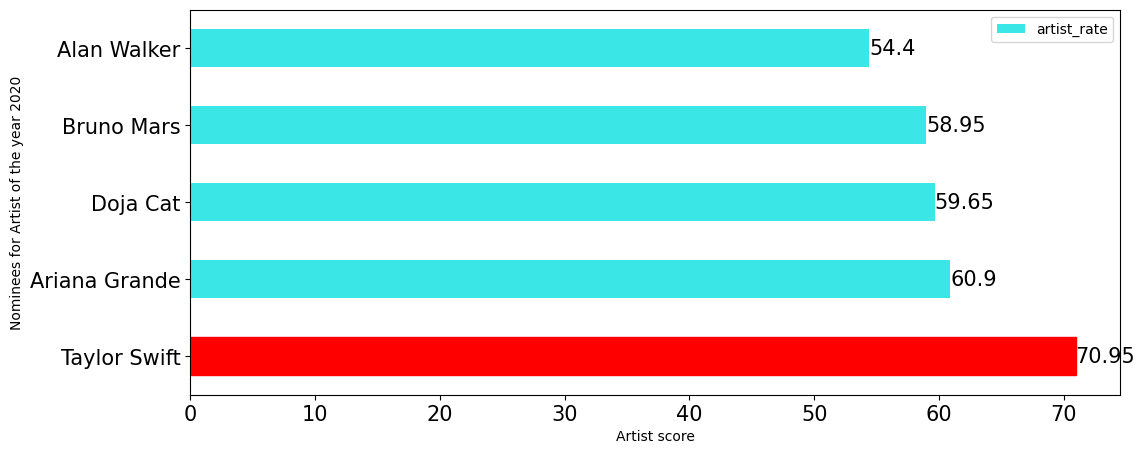

In [503]:
top_artists = songs_2021_df[songs_2021_df['artist_popularity'] == songs_2021_df['artist_popularity'].max()]
artist_top5_occurence = top_artists['artist'].str.join(',').str.split(',').explode().value_counts().nlargest(n=5)

artist_top5_2021 = artists_df[artists_df['name'].isin(artist_top5_occurence.index)][['name', 'popularity']]
artist_top5_2021 = artist_top5_2021.set_index('name').sort_index()
artist_top5_2021['occurence'] = artist_top5_occurence

artist_of_the_year_2021 = artist_top5_2021
artist_of_the_year_2021['artist_rate'] = artist_of_the_year_2021[['popularity', 'occurence']].agg(calculateArtistRate, axis=1)

ax = artist_top5_2021[['artist_rate']].sort_values('artist_rate', ascending=False).plot(kind='barh', color=(0.23, 0.9, 0.9), \
    figsize=(12, 5), xlabel='Artist score', ylabel='Nominees for Artist of the year 2020', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ALBUM OF THE YEAR 2021

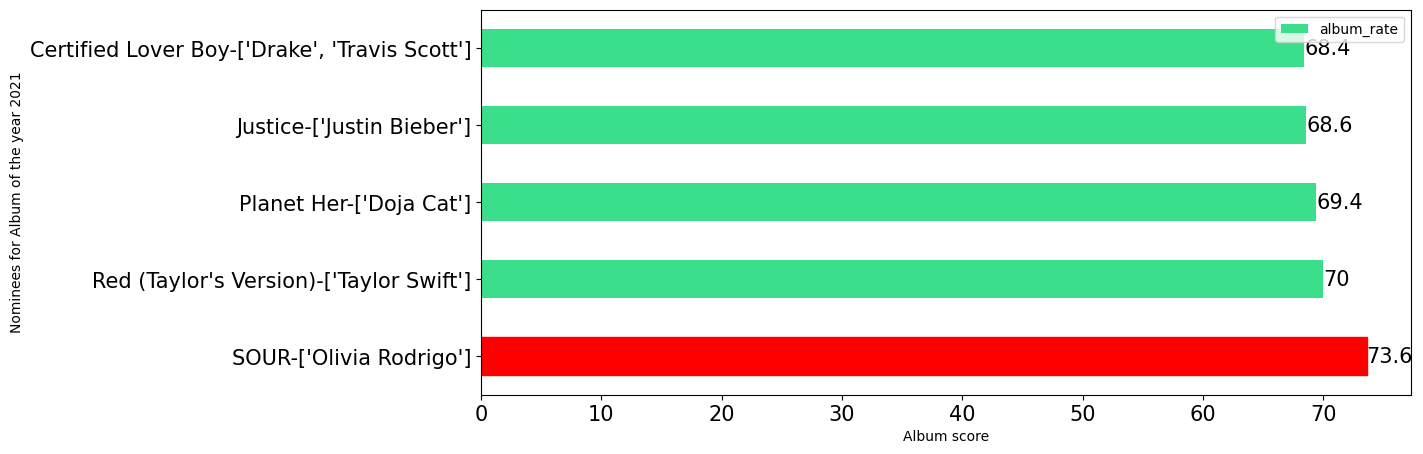

In [504]:
album_occurence = songs_2021_df.value_counts('album')
album_top5_2021 = songs_2021_df.drop_duplicates('album')[['album', 'album_info', 'album_popularity']].nlargest(n=5, columns='album_popularity')

album_occurence = album_occurence[album_occurence.index.map(lambda x: x in album_top5_2021['album'].to_list())].sort_index()
album_top5_2021 = album_top5_2021.set_index('album').sort_index()
album_top5_2021['occurence'] = album_occurence
album_of_the_year_2021 = album_top5_2021.set_index('album_info')

album_of_the_year_2021['album_rate'] = album_of_the_year_2021[['album_popularity', 'occurence']].agg(calculateAlbumRate, axis=1)

ax = album_of_the_year_2021[['album_rate']].sort_values('album_rate', ascending=False).plot(kind='barh', color=(0.23, 0.87, 0.54), \
    figsize=(12, 5), xlabel='Album score', ylabel='Nominees for Album of the year 2021', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

**STEP 5:** Announce the music chart best categories in year 2022
- SONG OF THE YEAR 2022

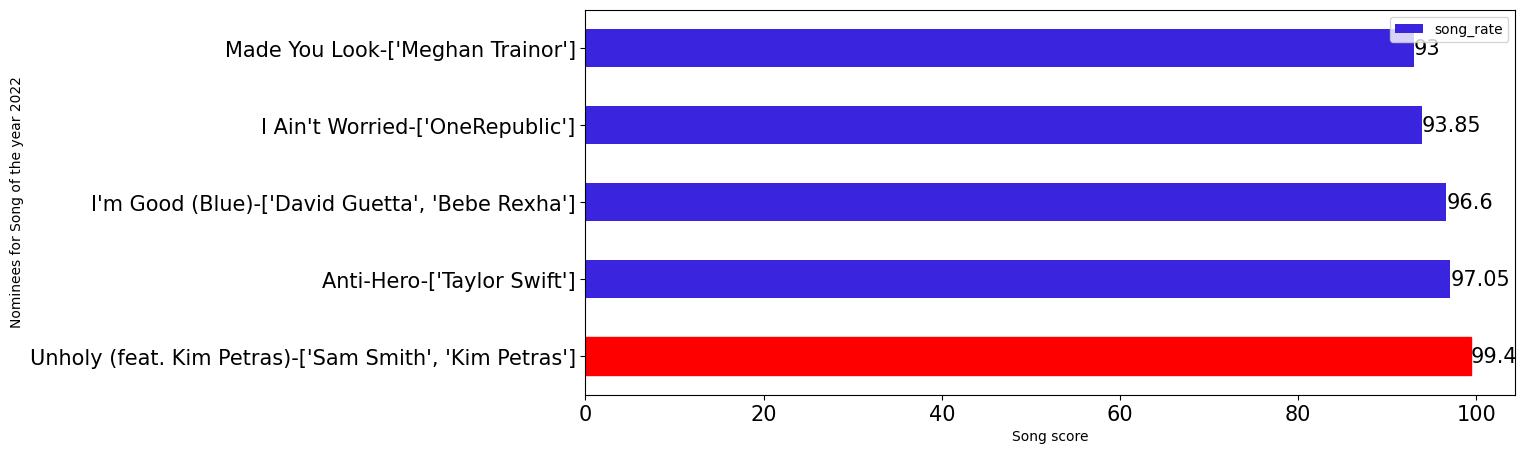

In [505]:
songs_2022_df['song_rate'] = songs_2022_df[['popularity', 'artist_popularity', 'album_popularity']].agg(calculateSongRate, axis=1);
song_of_the_year_2022 = songs_2022_df[['song_info', 'song_rate']].nlargest(n=5, columns=['song_rate']).set_index('song_info')

ax = song_of_the_year_2022.plot(kind='barh', color=(0.23, 0.14, 0.87), figsize=(12, 5), 
                        xlabel='Song score', ylabel='Nominees for Song of the year 2022', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ARTIST OF THE YEAR 2022

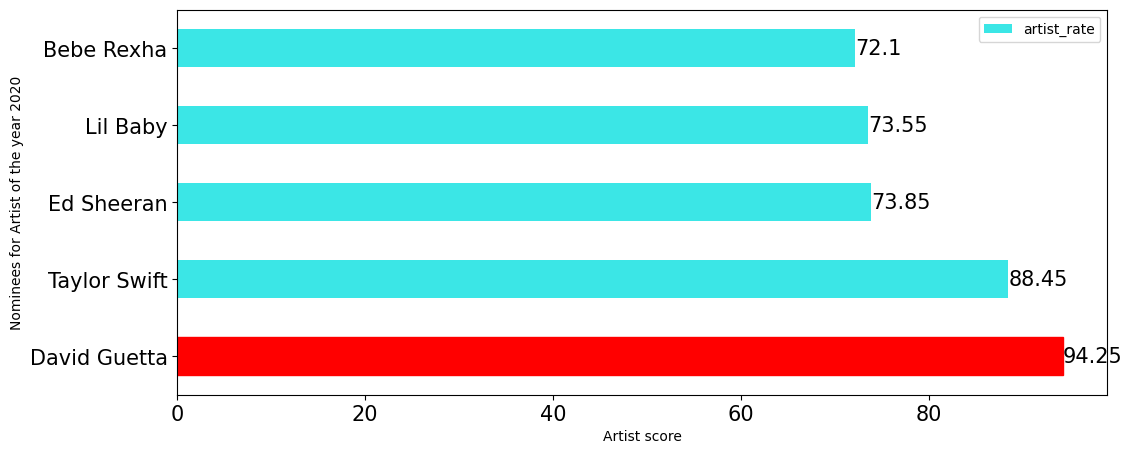

In [506]:
top_artists = songs_2022_df[songs_2022_df['artist_popularity'] == songs_2022_df['artist_popularity'].max()]
artist_top5_occurence = top_artists['artist'].str.join(',').str.split(',').explode().value_counts().nlargest(n=5)

artist_top5_2022 = artists_df[artists_df['name'].isin(artist_top5_occurence.index)][['name', 'popularity']]
artist_top5_2022 = artist_top5_2022.set_index('name').sort_index()
artist_top5_2022['occurence'] = artist_top5_occurence

artist_of_the_year_2022 = artist_top5_2022
artist_of_the_year_2022['artist_rate'] = artist_of_the_year_2022[['popularity', 'occurence']].agg(calculateArtistRate, axis=1)

ax = artist_top5_2022[['artist_rate']].sort_values('artist_rate', ascending=False).plot(kind='barh', color=(0.23, 0.9, 0.9), \
    figsize=(12, 5), xlabel='Artist score', ylabel='Nominees for Artist of the year 2020', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ALBUM OF THE YEAR 2022

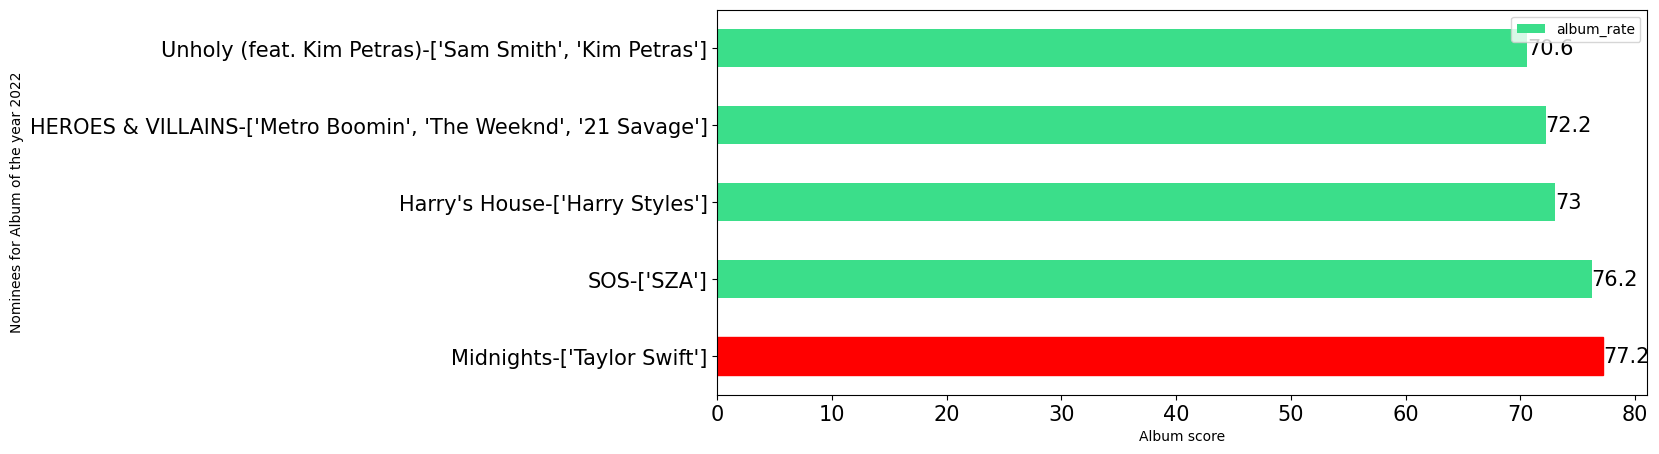

In [507]:
album_occurence = songs_2022_df.value_counts('album')
album_top5_2022 = songs_2022_df.drop_duplicates('album')[['album', 'album_info', 'album_popularity']].nlargest(n=5, columns='album_popularity')

album_occurence = album_occurence[album_occurence.index.map(lambda x: x in album_top5_2022['album'].to_list())].sort_index()
album_top5_2022 = album_top5_2022.set_index('album').sort_index()
album_top5_2022['occurence'] = album_occurence
album_of_the_year_2022 = album_top5_2022.set_index('album_info')

album_of_the_year_2022['album_rate'] = album_of_the_year_2022[['album_popularity', 'occurence']].agg(calculateAlbumRate, axis=1)

ax = album_of_the_year_2022[['album_rate']].sort_values('album_rate', ascending=False).plot(kind='barh', color=(0.23, 0.87, 0.54), \
    figsize=(12, 5), xlabel='Album score', ylabel='Nominees for Album of the year 2022', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

### <b><u>Question 5</u>: Honor best categories from 2020 to 2022 for Vietnamese songs (Song of the year, Artist of the year, Album of the year)</b>

**MEANING:** Providing the music chart in 3 years 2020, 2021 and 2022 in Vietnamese market, honoring best categories from all songs `Song of the year`, `Artist of the year` and `Album of the year` in Vietnam.

**STEP 1:** 

In [508]:
def isVietnamese(c):
    if type(c) == list:
        for i in c:
            if 'v-pop' in i or 'vietnamese' in i:
                return True
    return False

viet_songs_2020_df = songs_2020_df[songs_2020_df['genres'].apply(isVietnamese)]
viet_songs_2021_df = songs_2021_df[songs_2021_df['genres'].apply(isVietnamese)]
viet_songs_2022_df = songs_2022_df[songs_2022_df['genres'].apply(isVietnamese)]

**STEP 2:** Announce the Vietnamese music chart best categories in year 2020
- SONG OF THE YEAR 2020

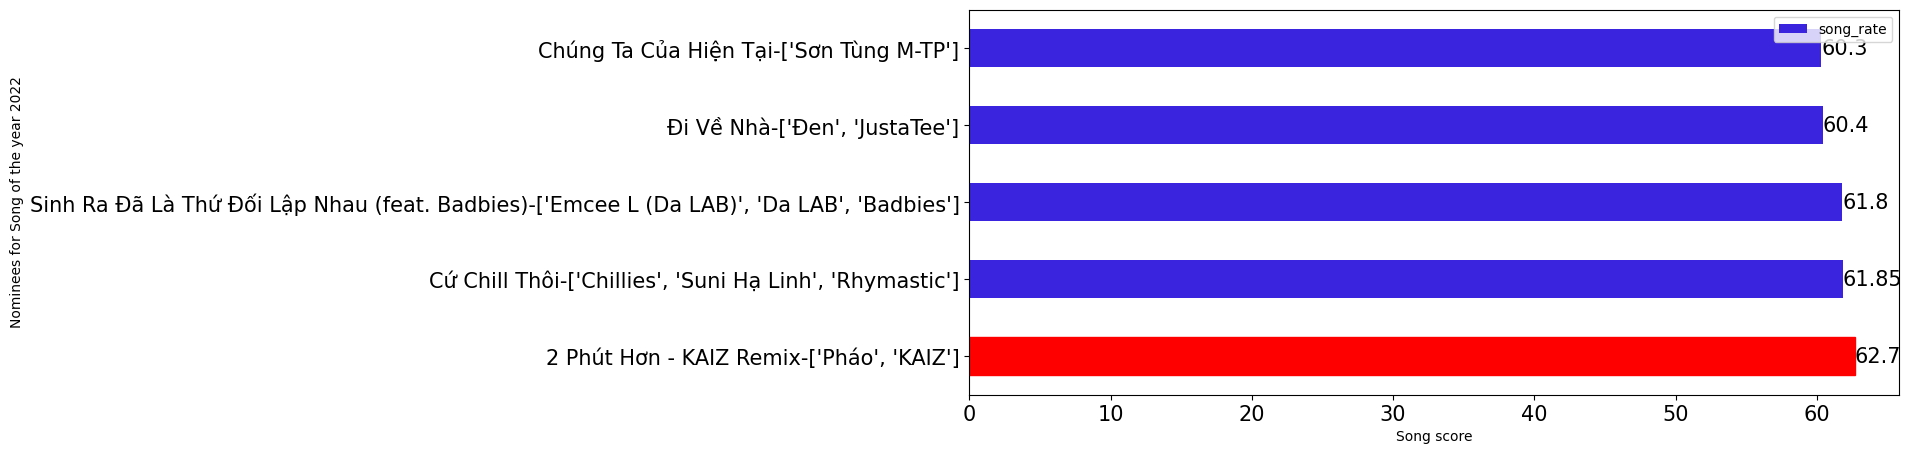

In [509]:
viet_songs_2020_df['song_rate'] = viet_songs_2020_df[['popularity', 'artist_popularity', 'album_popularity']].agg(calculateSongRate, axis=1);
song_of_the_year_2022 = viet_songs_2020_df[['song_info', 'song_rate']].nlargest(n=5, columns=['song_rate']).set_index('song_info')

ax = song_of_the_year_2022.plot(kind='barh', color=(0.23, 0.14, 0.87), figsize=(12, 5), 
                        xlabel='Song score', ylabel='Nominees for Song of the year 2022', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ARIST OF THE YEAR 2020

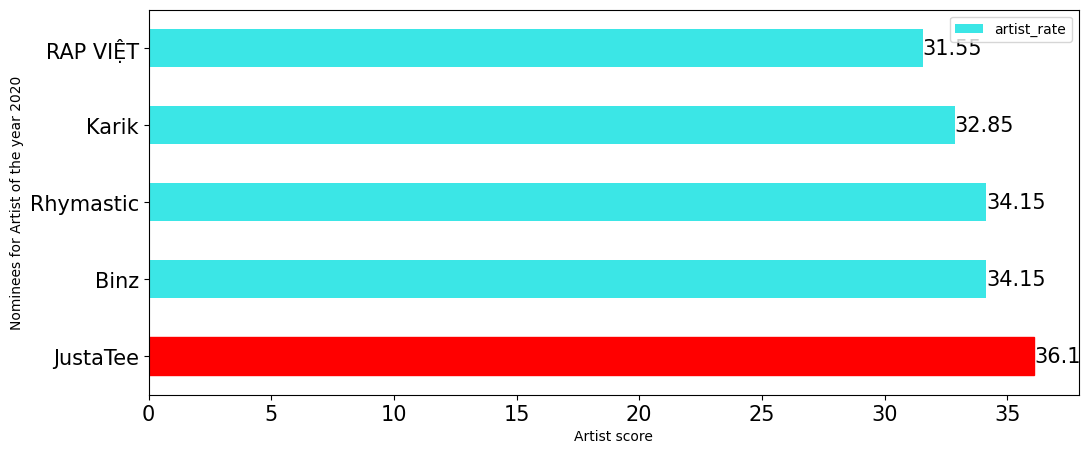

In [510]:
top_artists = viet_songs_2020_df[viet_songs_2020_df['artist_popularity'] == viet_songs_2020_df['artist_popularity'].max()]
artist_top5_occurence = top_artists['artist'].str.join(',').str.split(',').explode().value_counts().nlargest(n=5)

artist_top5_2022 = artists_df[artists_df['name'].isin(artist_top5_occurence.index)][['name', 'popularity']]
artist_top5_2022 = artist_top5_2022.set_index('name').sort_index()
artist_top5_2022['occurence'] = artist_top5_occurence

artist_of_the_year_2022 = artist_top5_2022
artist_of_the_year_2022['artist_rate'] = artist_of_the_year_2022[['popularity', 'occurence']].agg(calculateArtistRate, axis=1)

ax = artist_top5_2022[['artist_rate']].sort_values('artist_rate', ascending=False).plot(kind='barh', color=(0.23, 0.9, 0.9), \
    figsize=(12, 5), xlabel='Artist score', ylabel='Nominees for Artist of the year 2020', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ALBUM OF THE YEAR 2020

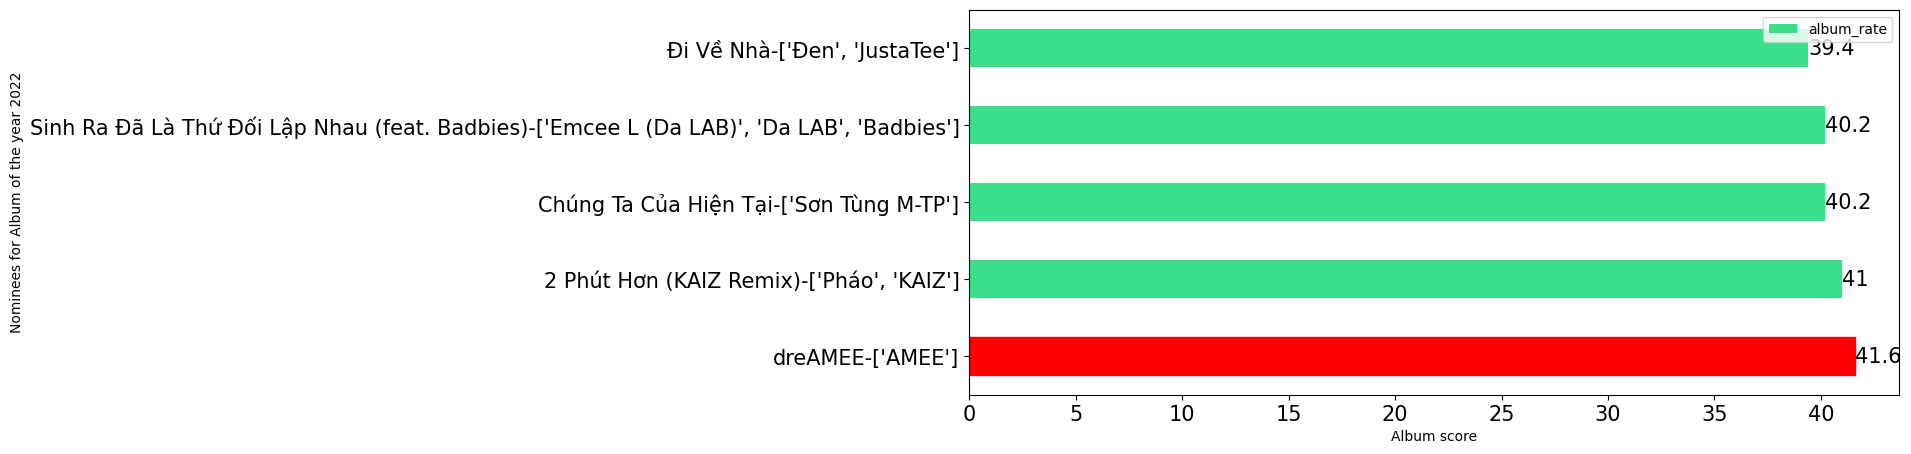

In [511]:
album_occurence = viet_songs_2020_df.value_counts('album')
viet_album_top5_2020 = viet_songs_2020_df.drop_duplicates('album')[['album', 'album_info', 'album_popularity']].nlargest(n=5, columns='album_popularity')

album_occurence = album_occurence[album_occurence.index.map(lambda x: x in viet_album_top5_2020['album'].to_list())].sort_index()
viet_album_top5_2020 = viet_album_top5_2020.set_index('album').sort_index()
viet_album_top5_2020['occurence'] = album_occurence
viet_album_of_the_year_2020 = viet_album_top5_2020.set_index('album_info')

viet_album_of_the_year_2020['album_rate'] = viet_album_of_the_year_2020[['album_popularity', 'occurence']].agg(calculateAlbumRate, axis=1)

ax = viet_album_of_the_year_2020[['album_rate']].sort_values('album_rate', ascending=False).plot(kind='barh', color=(0.23, 0.87, 0.54), \
    figsize=(12, 5), xlabel='Album score', ylabel='Nominees for Album of the year 2022', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

**STEP 3:** Announce the Vietnamese music chart best categories in year 2021
- SONG OF THE YEAR 2021

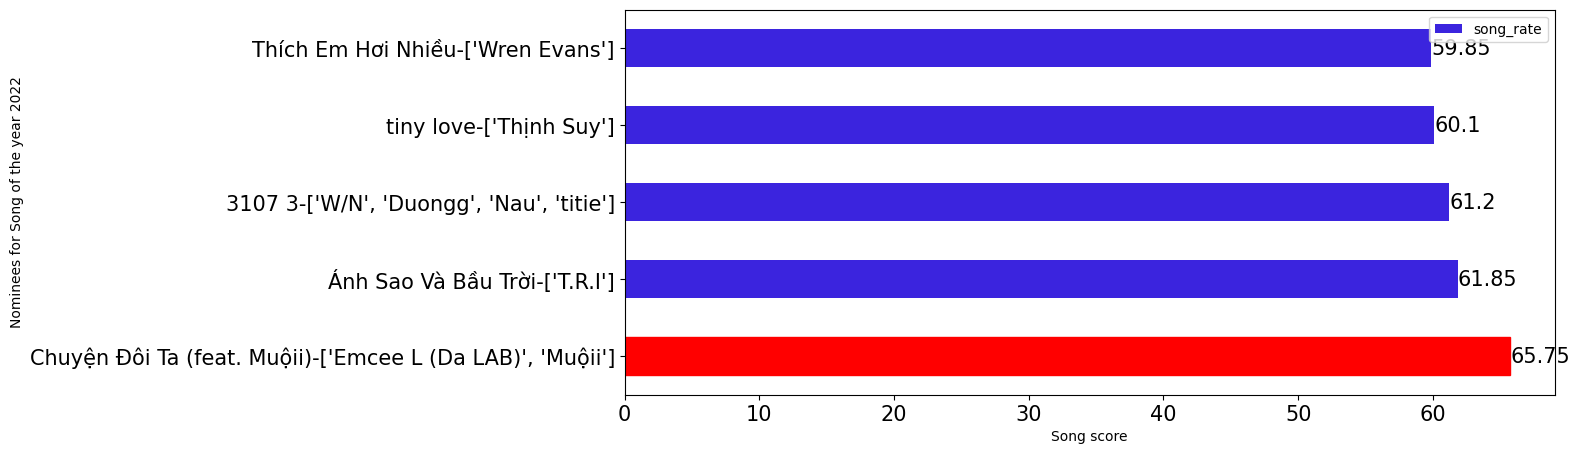

In [512]:
viet_songs_2021_df['song_rate'] = viet_songs_2021_df[['popularity', 'artist_popularity', 'album_popularity']].agg(calculateSongRate, axis=1);
song_of_the_year_2022 = viet_songs_2021_df[['song_info', 'song_rate']].nlargest(n=5, columns=['song_rate']).set_index('song_info')

ax = song_of_the_year_2022.plot(kind='barh', color=(0.23, 0.14, 0.87), figsize=(12, 5), 
                        xlabel='Song score', ylabel='Nominees for Song of the year 2022', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ARIST OF THE YEAR 2021

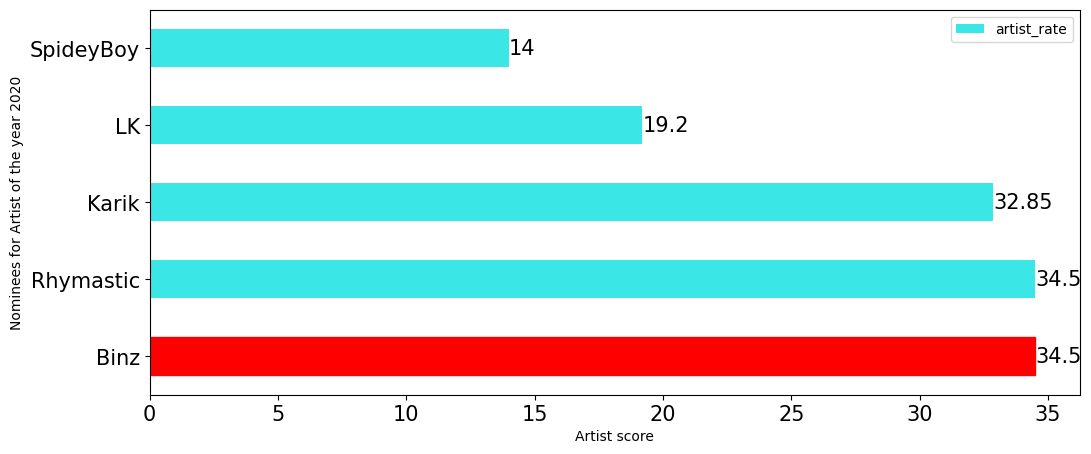

In [513]:
top_artists = viet_songs_2021_df[viet_songs_2021_df['artist_popularity'] == viet_songs_2021_df['artist_popularity'].max()]
artist_top5_occurence = top_artists['artist'].str.join(',').str.split(',').explode().value_counts().nlargest(n=5)

artist_top5_2022 = artists_df[artists_df['name'].isin(artist_top5_occurence.index)][['name', 'popularity']]
artist_top5_2022 = artist_top5_2022.set_index('name').sort_index()
artist_top5_2022['occurence'] = artist_top5_occurence

artist_of_the_year_2022 = artist_top5_2022
artist_of_the_year_2022['artist_rate'] = artist_of_the_year_2022[['popularity', 'occurence']].agg(calculateArtistRate, axis=1)

ax = artist_top5_2022[['artist_rate']].sort_values('artist_rate', ascending=False).plot(kind='barh', color=(0.23, 0.9, 0.9), \
    figsize=(12, 5), xlabel='Artist score', ylabel='Nominees for Artist of the year 2020', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ALBUM OF THE YEAR 2021

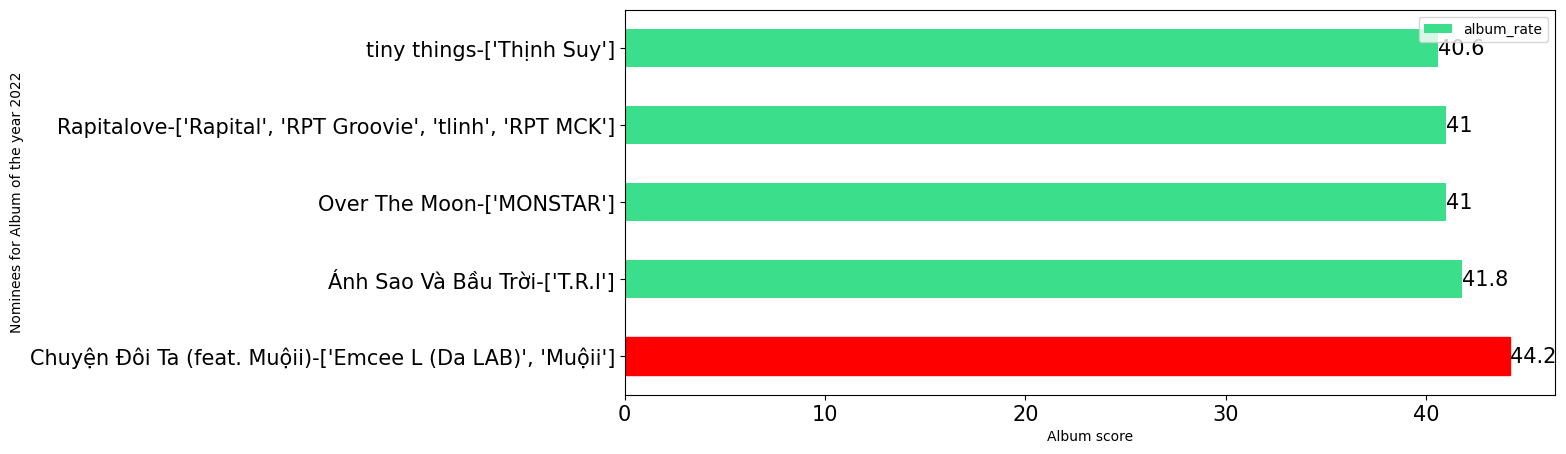

In [514]:
album_occurence = viet_songs_2021_df.value_counts('album')
viet_album_top5_2021 = viet_songs_2021_df.drop_duplicates('album')[['album', 'album_info', 'album_popularity']].nlargest(n=5, columns='album_popularity')

album_occurence = album_occurence[album_occurence.index.map(lambda x: x in viet_album_top5_2021['album'].to_list())].sort_index()
viet_album_top5_2021 = viet_album_top5_2021.set_index('album').sort_index()
viet_album_top5_2021['occurence'] = album_occurence
viet_album_of_the_year_2021 = viet_album_top5_2021.set_index('album_info')

viet_album_of_the_year_2021['album_rate'] = viet_album_of_the_year_2021[['album_popularity', 'occurence']].agg(calculateAlbumRate, axis=1)

ax = viet_album_of_the_year_2021[['album_rate']].sort_values('album_rate', ascending=False).plot(kind='barh', color=(0.23, 0.87, 0.54), \
    figsize=(12, 5), xlabel='Album score', ylabel='Nominees for Album of the year 2022', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

**STEP 4:** Announce the Vietnamese music chart best categories in year 2022
- SONG OF THE YEAR 2022

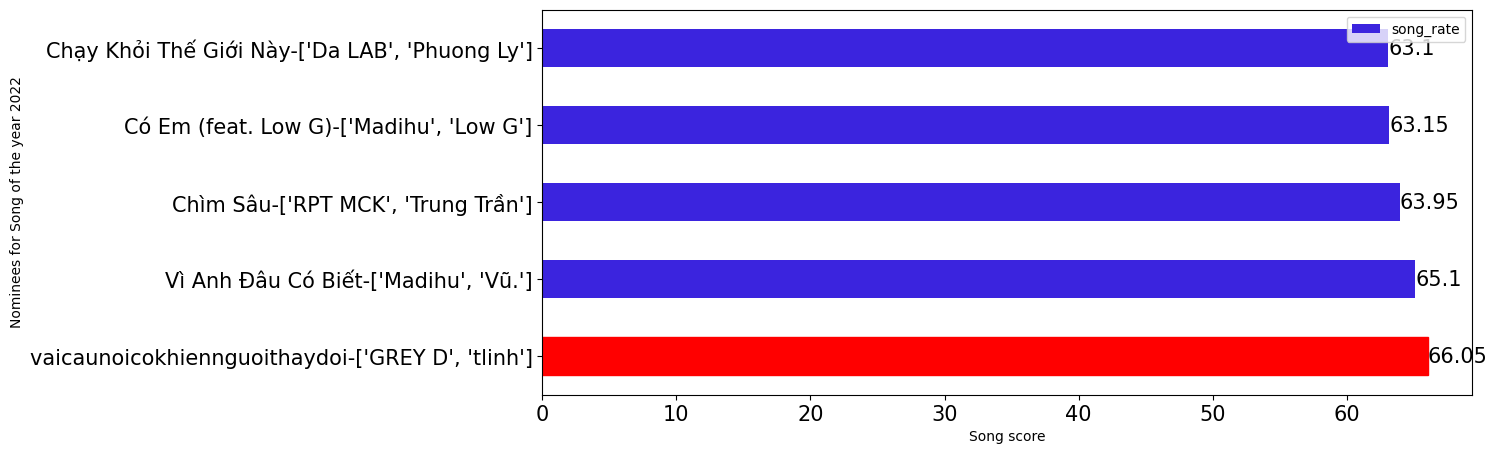

In [515]:
viet_songs_2022_df['song_rate'] = viet_songs_2022_df[['popularity', 'artist_popularity', 'album_popularity']].agg(calculateSongRate, axis=1);
song_of_the_year_2022 = viet_songs_2022_df[['song_info', 'song_rate']].nlargest(n=5, columns=['song_rate']).set_index('song_info')

ax = song_of_the_year_2022.plot(kind='barh', color=(0.23, 0.14, 0.87), figsize=(12, 5), 
                        xlabel='Song score', ylabel='Nominees for Song of the year 2022', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ARIST OF THE YEAR 2022

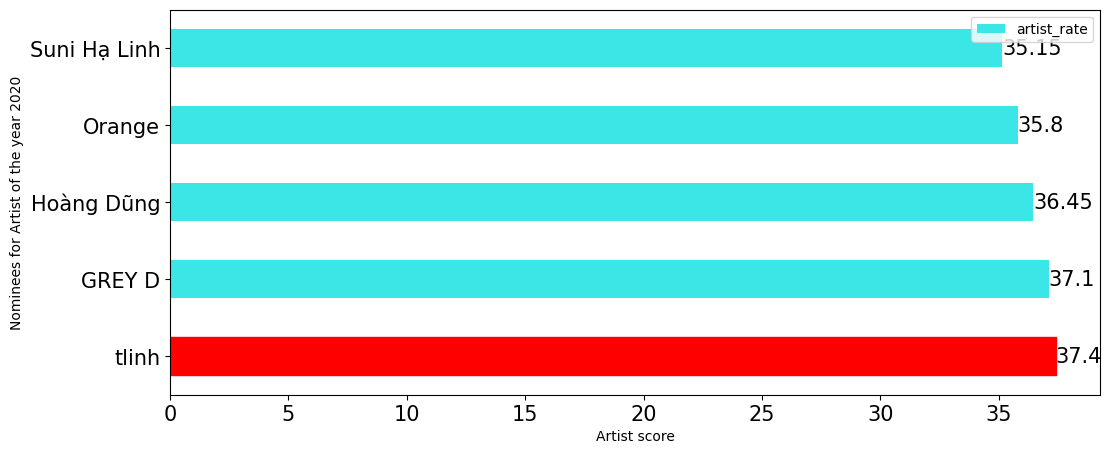

In [516]:
top_artists = viet_songs_2022_df[viet_songs_2022_df['artist_popularity'] == viet_songs_2022_df['artist_popularity'].max()]
artist_top5_occurence = top_artists['artist'].str.join(',').str.split(',').explode().value_counts().nlargest(n=5)

artist_top5_2022 = artists_df[artists_df['name'].isin(artist_top5_occurence.index)][['name', 'popularity']]
artist_top5_2022 = artist_top5_2022.set_index('name').sort_index()
artist_top5_2022['occurence'] = artist_top5_occurence

artist_of_the_year_2022 = artist_top5_2022
artist_of_the_year_2022['artist_rate'] = artist_of_the_year_2022[['popularity', 'occurence']].agg(calculateArtistRate, axis=1)

ax = artist_top5_2022[['artist_rate']].sort_values('artist_rate', ascending=False).plot(kind='barh', color=(0.23, 0.9, 0.9), \
    figsize=(12, 5), xlabel='Artist score', ylabel='Nominees for Artist of the year 2020', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

- ALBUM OF THE YEAR 2022

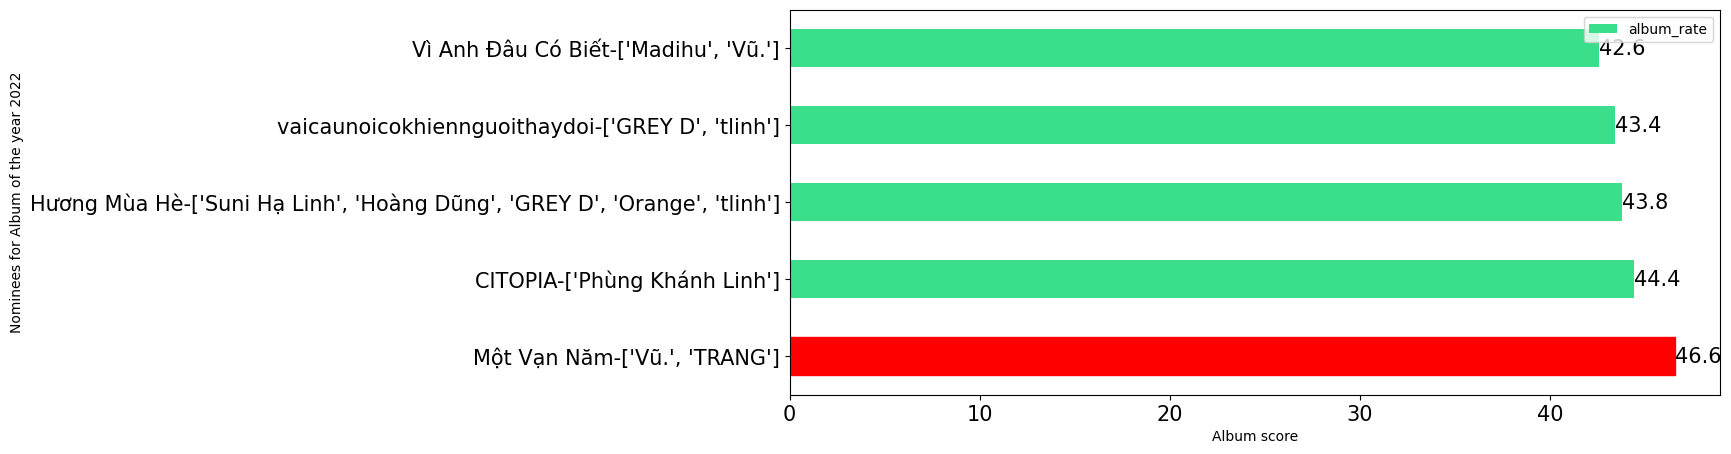

In [517]:
album_occurence = viet_songs_2022_df.value_counts('album')
viet_album_top5_2022 = viet_songs_2022_df.drop_duplicates('album')[['album', 'album_info', 'album_popularity']].nlargest(n=5, columns='album_popularity')

album_occurence = album_occurence[album_occurence.index.map(lambda x: x in viet_album_top5_2022['album'].to_list())].sort_index()
viet_album_top5_2022 = viet_album_top5_2022.set_index('album').sort_index()
viet_album_top5_2022['occurence'] = album_occurence
viet_album_of_the_year_2022 = viet_album_top5_2022.set_index('album_info')

viet_album_of_the_year_2022['album_rate'] = viet_album_of_the_year_2022[['album_popularity', 'occurence']].agg(calculateAlbumRate, axis=1)

ax = viet_album_of_the_year_2022[['album_rate']].sort_values('album_rate', ascending=False).plot(kind='barh', color=(0.23, 0.87, 0.54), \
    figsize=(12, 5), xlabel='Album score', ylabel='Nominees for Album of the year 2022', fontsize=15)
ax.get_children()[0].set_color('r')
ax.bar_label(ax.containers[0], fontsize=15);

----
### <b> This is the end of Phase 3</b>